# Подготовка данных

## Подключение библиотек

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

## Подключение Google-drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Загрузка данных

In [22]:
data_train = pd.read_csv('/content/drive/MyDrive/datasets/mnist_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/datasets/mnist_test.csv')

## Ограничение набора данных

In [23]:
data_train = data_train[:1000]
data_test = data_test[:200]

## Просмотрим полученные тренировочные данные

### Датасет

In [24]:
data_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Как выглядит строка датасета в реальности

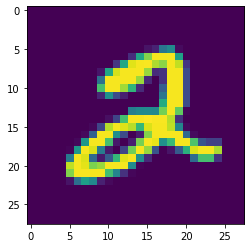

In [25]:
img = np.reshape(list(data_train.iloc[5][1:785]), (28, 28))
plt.imshow(img)

## Преобразуем к массиву

In [26]:
data_train.to_numpy()

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

## Отделим данные от меток

In [27]:
data_train_copy = data_train.copy()
data_test_copy = data_test.copy()
del data_train_copy['label']
X_train = data_train_copy
del data_test_copy['label']
X_test = data_test_copy
del data_train_copy
del data_test_copy

In [28]:
X_train.shape, X_test.shape

((1000, 784), (200, 784))

## Нормализуем данные

In [29]:
X_train /= 255
X_test /= 255

## Закодируем метки классов

In [30]:
encoding = OneHotEncoder(sparse=False, handle_unknown='error')
labels = pd.concat([data_train[['label']], data_test[['label']]])
encoding.fit(labels)
y_train = pd.DataFrame(encoding.transform(data_train[['label']]))
y_test = pd.DataFrame(encoding.fit_transform(data_test[['label']]))
y_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Финальный штрих. Приведем все датасеты к массивам для дальнейшей работы

In [31]:
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy()

# Работа с алгоритмом

## Функции активации

In [32]:
def relu(x):
    return (x > 0) * x 

def relu_two_deriv(output):
    return output>0 

## Модель предсказания сети 

In [33]:
def model_prediction(input, weights_0_1, weights_1_2):
  layer_0 = input
  layer_1 = relu(np.dot(layer_0,weights_0_1))
  layer_2 = np.dot(layer_1,weights_1_2)
  return layer_2

## Стохастический градиентный спуск

In [34]:
np.random.seed(1)

learning_rate = 0.005
hidden_size = 40
input_size = 784
num_labels = 10
dropout_ratio = 0.5
EPOCHS = 6

weights_input_hidden = (2*np.random.random((input_size,hidden_size)) - 1) / np.sqrt(input_size) #веса между входным и скрытым слоями
weights_hidden_output = (2*np.random.random((hidden_size, num_labels)) - 1) / np.sqrt(hidden_size) #веса между скрытым и выходным слоями 

array_iteration = []
array_error = []
array_accuracy = []


for iteration in range(EPOCHS):
   error = 0
   for i in range(len(X_train)):
     #forward pass
     input_layer = X_train[i:i+1]
     hidden_layer = relu(np.dot(input_layer,weights_input_hidden))
     mask = np.random.binomial(size=hidden_layer.shape, n=1, p=dropout_ratio)
     hidden_layer = hidden_layer*mask
     hidden_layer = hidden_layer * 1/(1 - dropout_ratio) 
     output_layer = np.dot(hidden_layer,weights_hidden_output) 

     error+= np.sum((output_layer - y_train[i:i+1]) ** 2)

     #backward pass
     diff_between_output_hidden = 2*(output_layer - y_train[i:i+1])
     weight_hidden_output_corrections = hidden_layer.T.dot(diff_between_output_hidden) #величина коррекции для весов между layer_1 и layer_2
    
     diff_between_hidden_input = diff_between_output_hidden.dot(weights_hidden_output.T)*relu_two_deriv(hidden_layer)
     diff_between_hidden_input = diff_between_hidden_input*mask
     diff_between_hidden_input = diff_between_hidden_input * 1/(1 - dropout_ratio) # 1/1-p
     weight_input_hidden_corrections = input_layer.T.dot(diff_between_hidden_input)

     weights_hidden_output = weights_hidden_output - learning_rate * weight_hidden_output_corrections
     weights_input_hidden = weights_input_hidden - learning_rate * weight_input_hidden_corrections

   if(iteration % 1 == 0):
      array_iteration.append(iteration)
      array_error.append(error)
      goal_idx = np.argmax(y_train[:100], axis=1)
      y_pred = model_prediction(X_train[:100], weights_input_hidden, weights_hidden_output)
      pred_idx = np.argmax(y_pred, axis=1)
      accuracy = accuracy_score(goal_idx ,pred_idx)
      array_accuracy.append(accuracy)
      print("epoch:" + str(iteration) + "  Error:" + str(error) + " Acc:" + str(accuracy))

epoch:0  Error:763.083556506058 Acc:0.79
epoch:1  Error:598.4188657898604 Acc:0.84
epoch:2  Error:540.9682055371612 Acc:0.91
epoch:3  Error:518.4441203719691 Acc:0.87
epoch:4  Error:485.2117056754537 Acc:0.92
epoch:5  Error:458.4891201612029 Acc:0.95


## Построение графиков

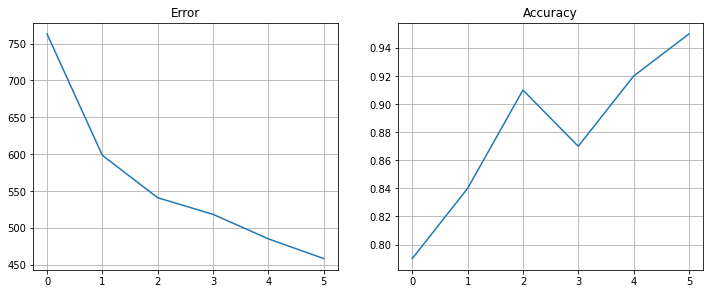

In [35]:
graph = plt.figure(figsize=(12, 10), constrained_layout=False)

error_range = np.linspace(0.18, 0)

subgraph_1 = graph.add_subplot(221)
subgraph_1.plot(array_iteration, array_error)
subgraph_1.set_title('Error')
plt.grid()

subgraph_2 = graph.add_subplot(222)
subgraph_2.plot(array_iteration, array_accuracy)
subgraph_2.set_title('Accuracy')
plt.grid()

## Пакетный градиентный спуск

In [36]:
learning_rate = 0.005
hidden_size = 64
input_size = 784
num_labels = 10
batch_size = 32
n_iterations = len(X_train) // batch_size
counts_epochs  = 3
dropout_ratio = 0.5

weights_input_hidden_batch = (2*np.random.random((input_size,hidden_size)) - 1) / np.sqrt(input_size) #веса между входным и скрытым слоями
weights_hidden_output_batch = (2*np.random.random((hidden_size, num_labels)) - 1) / np.sqrt(hidden_size) #веса между скрытым и выходным слоями 

array_iteration_batch = []
array_error_batch = []
array_accuracy_batch = []


for epoch in range(counts_epochs):
   error = 0
   for i in range(n_iterations):
     #forward pass
     input_layer_batch = X_train[i * batch_size:(i+1) * batch_size]
     hidden_layer_batch = relu(np.dot(input_layer_batch, weights_input_hidden_batch))
     mask = np.random.binomial(size=hidden_layer_batch.shape, n=1, p=dropout_ratio)
     hidden_layer_batch = hidden_layer_batch*mask
     hidden_layer_batch *= 1/(1 - dropout_ratio) # 1/1-p
     output_layer_batch = np.dot(hidden_layer_batch, weights_hidden_output_batch)

     error += np.mean((output_layer_batch - y_train[i * batch_size:(i+1) * batch_size]) ** 2)

     #backward pass
     diff_between_output_hidden_batch = 2*(output_layer_batch - y_train[i * batch_size:(i+1) * batch_size]) 
     weight_output_hidden_batch_corrections = hidden_layer_batch.T.dot(diff_between_output_hidden_batch) #величина коррекции для весов между layer_1 и layer_2
    
     diff_between_hidden_input_batch = diff_between_output_hidden_batch.dot(weights_hidden_output_batch.T)*relu_two_deriv(hidden_layer_batch)
     diff_between_hidden_input_batch = diff_between_hidden_input_batch*mask
     diff_between_hidden_input_batch = diff_between_hidden_input_batch * 1/(1 - dropout_ratio) # 1/1-p
     weight_hidden_input_batch_corrections = input_layer_batch.T.dot(diff_between_hidden_input_batch)

     weights_hidden_output_batch = weights_hidden_output_batch - learning_rate * weight_output_hidden_batch_corrections
     weights_input_hidden_batch = weights_input_hidden_batch - learning_rate * weight_hidden_input_batch_corrections

   if(epoch % 1 == 0):
      print("Error:", error / n_iterations) # mean accross training set
      array_iteration_batch.append(epoch)
      array_error_batch.append(error)
      goal_idx = np.argmax(y_train[:100], axis=1)
      y_pred = model_prediction(X_train[:100], weights_input_hidden_batch, weights_hidden_output_batch)
      pred_idx = np.argmax(y_pred, axis=1)
      accuracy = accuracy_score(goal_idx ,pred_idx)
      array_accuracy_batch.append(accuracy)
      print("Acc:", str(accuracy))
    

Error: 0.07691419818570673
Acc: 0.75
Error: 0.056789232992871315
Acc: 0.83
Error: 0.04957458943379732
Acc: 0.86


## Построение графиков

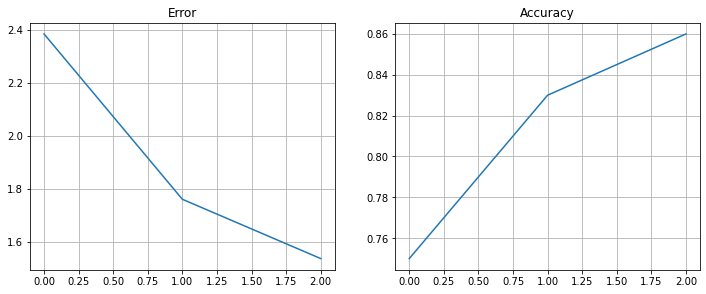

In [37]:
graph_batch = plt.figure(figsize=(12, 10), constrained_layout=False)

error_range = np.linspace(0.15, 0)

subgraph_batch_1 = graph_batch.add_subplot(221)
subgraph_batch_1.plot(array_iteration_batch, array_error_batch)
subgraph_batch_1.set_title('Error')
plt.grid()

subgraph_batch_2 = graph_batch.add_subplot(222)
subgraph_batch_2.plot(array_iteration_batch, array_accuracy_batch)
subgraph_batch_2.set_title('Accuracy')
plt.grid()

## Предсказание

In [38]:
goal_idx = np.argmax(y_test, axis=1)
y_pred = model_prediction(X_test, weights_input_hidden_batch, weights_hidden_output_batch)
pred_idx = np.argmax(y_pred, axis=1)
acc = accuracy_score(goal_idx ,pred_idx)
array_accuracy_batch.append(acc)
print("Test Acc:", acc)

Test Acc: 0.815
